In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from segmentacion.globalT import thresholdingGlobal
from formas_binarias import ErosionBin

In [3]:
imagen = cv2.imread('imagenesPruebas/Kmeans.png')
img = np.array(imagen)

In [4]:
print(img.shape)
imgRecortada = img[:580,:,:]

(963, 693, 3)


In [7]:
def rgb2grayInverse(rgb):
    return np.dot(rgb[..., :3], [0.114, 0.587, 0.299]).astype(np.uint8)

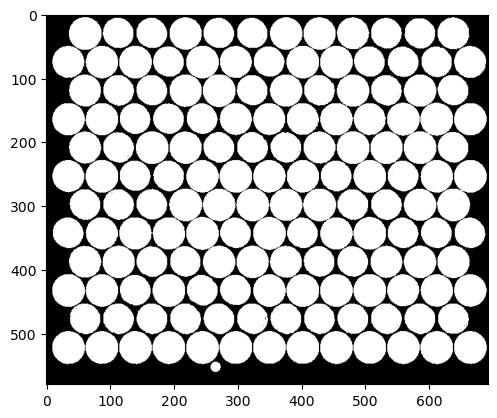

In [15]:
from segmentacion.bernsen import Bernsen
img = np.array(imgRecortada)
imggrayI= rgb2grayInverse(img)
globalX = thresholdingGlobal(imggrayI, 10)
globalXI = globalX
plt.imshow(globalXI, cmap ='gray')

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_erosion

def detectar_bordes_binarios(imagen_binaria):
    bordes = imagen_binaria - ErosionBin(imagen_binaria, 5)
    return bordes
bordes_detectados = detectar_bordes_binarios(globalXI)


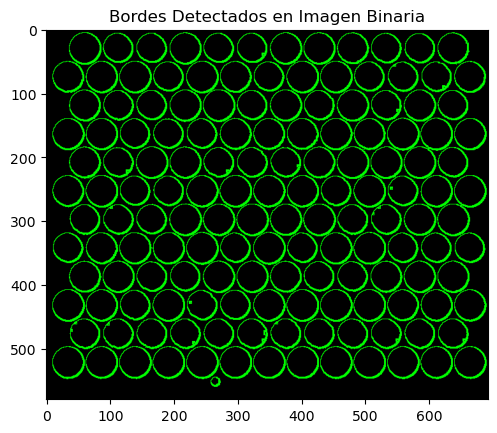

In [44]:
canalVerde = np.zeros_like(bordes_detectados)
canalRojo = np.where(bordes_detectados == 1, 255, bordes_detectados)
CanalAzul = np.zeros_like(bordes_detectados)
matriz_visualizada = np.stack((canalVerde, canalRojo, CanalAzul), axis=-1)
plt.imshow(matriz_visualizada)
plt.title('Bordes Detectados en Imagen Binaria')
plt.show()

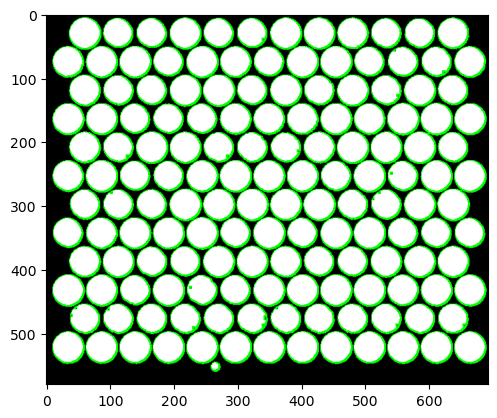

In [45]:
combination = np.zeros_like(matriz_visualizada)  # Crea una matriz de ceros del mismo tamaño que globalX

for x in range(img.shape[1]):
    for y in range(img.shape[0]):
        if globalXI[y, x] == 1:
            combination[y, x, :] =[255,255,255]
        else:
            combination[y, x, :] =[0,0,0]
        if (matriz_visualizada[y,x,1] == 255):
            combination[y, x, :] = matriz_visualizada[y,x,:]

plt.imshow(combination)
plt.show()

In [ ]:
import pandas as pd
import numpy as np 
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def disEuclidian(point1, point2):
    return np.sqrt(sum((x - y) ** 2 for x, y in zip(point1, point2)))

def centroidsRand(data, k):
    centroids = random.sample(data, k)
    return centroids

def AsignCentroids(data, centroids):
    clusters = [[] for _ in range(len(centroids))]
    
    for point in data:
        distances = [disEuclidian(point, centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))
        clusters[cluster_index].append(point)
    
    return clusters

def newCentroids(clusters):
    centroids = []
    for cluster in clusters:
        cluster_center = [sum(point[i] for point in cluster) / len(cluster) for i in range(len(cluster[0]))]
        centroids.append(cluster_center)
    return centroids

def covergencia(old_centroids, new_centroids, tol=1e-4):
    return all(disEuclidian(old, new) < tol for old, new in zip(old_centroids, new_centroids))

def k_means(data, k):
    centroids = centroidsRand(data, k)
    converged = False
    
    while not converged:
        clusters = AsignCentroids(data, centroids)
        new_centroids = newCentroids(clusters)
        converged = covergencia(centroids, new_centroids)
        centroids = new_centroids
    
    return centroids, clusters

def plot_clusters(centroids, clusters):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Graficar puntos y centroides
    for i, cluster in enumerate(clusters):
        x, y = zip(*cluster)
        ax1.scatter(x, y, label=f'Cluster {i + 1}')

    centroids_x, centroids_y = zip(*centroids)
    ax1.scatter(centroids_x, centroids_y, color='black', marker='x', s=100, label='Centroides')

    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_title('K-Means Clustering')
    ax1.legend()
    ax1.grid(True)

def plot_clusters_3d(centroids, clusters):
    fig = plt.figure(figsize=(10, 6))
    ax1 = fig.add_subplot(111, projection='3d')

    for i, cluster in enumerate(clusters):
        x, y, z = zip(*cluster)
        ax1.scatter(x, y, z, label=f'Cluster {i + 1}')

    centroids_x, centroids_y, centroids_z = zip(*centroids)
    ax1.scatter(centroids_x, centroids_y, centroids_z, color='black', marker='x', s=100, label='Centroides')

    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('K-Means Clustering in 3D')
    ax1.legend()

    plt.show()

def calculate_inertia(k, clusters, centroids):
    total_inertia = 0
    for i in range(k):
        cluster_points = clusters[i]
        centroid = centroids[i]
        inertia_cluster = sum(disEuclidian(centroid, point) ** 2 for point in cluster_points)
        total_inertia += inertia_cluster
    return total_inertia


In [ ]:
def kMeansCompleteIMG(IMG, k): 
    R, G, B = IMG[:, :, 0].reshape(-1, 1) , IMG[:, :, 1].reshape(-1, 1) , IMG[:, :, 2].reshape(-1, 1)
    nueva_matriz = np.column_stack((R, G, B))
    data_list = nueva_matriz.tolist()
    centroids, clusters = k_means(data_list, k)    
    
    inertia = []
    for k in range(1, len(clusters) + 1):
        total_inertia = calculate_inertia(k, clusters, centroids)
        inertia.append(total_inertia)

    plot_clusters_3d(centroids, clusters)
  
    for i, centroid in enumerate(centroids):
        print(f"Centroide {i + 1}: {centroid}")
        print(f"Puntos en el cluster {i + 1}: {clusters[i]}")
        
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(clusters) + 1), inertia, marker='o', linestyle='-', color='b')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Inercia')
    plt.title('Método del Codo para Determinar k')
    plt.grid(True)
    plt.show()

In [ ]:
kMeansCompleteIMG(imgRecortada, 5)

KeyboardInterrupt: 